<a href="https://colab.research.google.com/github/harry-shimokawa/OESON_ML_PROJECT/blob/mainhttps%2Fgithub.com%2Fharry-shimokawa%2FEDA-on-data-sience-job-salalries/OESON_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OESON: EDA & MACHINE LEARNING**

**Submitted by**

| Name            | Position             |
|-----------------|----------------------|
| Atsuya Shimokawa | Data Science Intern |



---





# **Project Description**

<a id="pd"></a>

**Background**: Assume that I am part of a consultancy team tasked with assisting an e-commerce company in understanding customer shopping behaviors. The company has compiled a year's worth of user session data, where each record corresponds to a different user's activity. The dataset includes a mix of user attributes and their interactions with the website.

**Objective**: The primary goal is to analyze customer behavior and develop a predictive model to forecast whether a user will make a purchase within the year, indicated by the `Made_purchase` attribute. It's important to note that the dataset may contain errors due to the collection by non-experts.

**Data Description**

Each row in the dataset represents a unique user session, encompassing various attributes such as session duration, pages visited, and user demographics. The `Made_purchase` column is binary, signifying whether a purchase was made during the user's session.

**Evaluation Criteria**

The success of predictive models will be measured by the [Mean F1-Score](https://en.wikipedia.org/wiki/F-score), which harmonizes precision and recall. This metric ensures that a balanced model is developed, valuing both the correct identification of positive cases and the minimization of false positives.

**Submissions**

My submission is a CSV file containing predictions for each user session, structured as follows:

$$
    \begin{array}{c|c}
        \text{`id`} & \text{`Made\_Purchase`} \\
        \hline
        1 & \text{False} \\
        2 & \text{True} \\
        \ldots & \ldots \\
    \end{array}
$$

The file includes a header row and follows this exact format for compatibility and evaluation purposes.

**Deliverables**

1. A detailed report or presentation outlining my analytical approach, data preprocessing steps, exploratory data analysis findings, model development process, and insights.
2. The final predictive model, along with the code and documentation for reproducing the results.
3. The submission CSV file containing my predictions.




# Table of Contents
<a id="toc"></a>


## Project Description
* [Project Description](#pd)

## Table of Contents
* [Table of Contents](#toc)
* [Data Analysis](#data_analysis)
    1. [Loading the data](#data_loading)
    2. [Correcting Datatypes](#cdt)
    3. [Data Statistics](#dstats)
    4. [Null Value Analysis](#nva)
    5. [Target Analysis](#target)
    6. [Univariate Analysis](#uva)
        1. [Numerical Features](#unf)
        2. [Categorical Features](#ucf)
    7. [Bivariate Analysis](#bva)
        1. [Numerical vs Made_Purchase](#bvnmp)
    8. [Multivariate Analysis](#mva)
        1. [Numerical Pairplots](#mvnpp)
* [Data Preprocessing and Model Training](#dpmt)
    1. [Custom Preprocessing Methods](#dpmtcpm)
    2. [Preprocessing Pipeline](#ppp)
    3. [Splitting Training and Test Datasets](#sttd)
    4. [Model Selection](#mods)
        1. [Baseline Model](#modsbm)
        2. [Binary Classifiers](#modsbc)
        3. [Ensembling Classifiers](#modsec)
    5. [Final Model Training and Tuning](#mtt)
    6. [Evaluating the Model](#etm)
* [Submission](#sub)
* [Conclusion](#section-three)





# Data analysis
<a id="data_analysis"></a>


###  Standard Library Imports

First, we'll import essential Python libraries to support our data analysis and manipulation needs:

In [ ]:
import numpy as np  # For linear algebra operations
import pandas as pd # For data processing and reading CSV files

- **Numpy (np):** Utilized for conducting mathematical operations and simplifying tasks with its predefined functions.
- **Pandas (pd):** A data manipulation library crucial for handling DataFrames effectively.

###  Importing Libraries

Next, we import additional libraries for data modeling and visualization:

In [ ]:
import scipy as stats  # For scientific computing
import matplotlib.pyplot as plt  # For basic visualizations
import matplotlib.patheffects as path_effects
import seaborn as sns  # For advanced data visualizatio


# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")



- **XGBoost (xgb):** A powerful library for building ensemble machine learning models.
- **SciPy (stats):** Used for scientific and technical computing.
- **Matplotlib (plt):** A fundamental library for creating static, animated, and interactive visualizations in Python.
- **Seaborn (sns):** A visualization library based on matplotlib that offers a higher-level interface for drawing attractive and informative statistical graphics.
- **Imbalanced-learn:** Provides tools for dealing with class imbalance by applying under-sampling and over-sampling techniques.

By importing these libraries, we are equipping ourselves with a comprehensive toolkit for data analysis, preprocessing, modeling, and visualization.


##  Loading the data
<a id="data_loading"></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/train_data.csv')
sub_data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/test_data.csv')


Mounted at /content/drive


In [ ]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


Observations

<ul>
    <li><b>Numerical Features</b>: HomePage, HomePage_Duration, LandingPage, LandingPage_Duration, ProductDescriptionPage, ProductDescriptionPage_Duration, GoogleMetric:Bounce Rates, GoogleMetric:Exit Rates, GoogleMetric:Page Values.
    <li><b>Categorical Features</b>: Month_SeasonalPurchase, CustomerType, Gender, Cookies Setting, Education, Marital Status, WeekendPurchase, Made_Purchase.
    <li><i>SeasonalPurchase, OS, SearchEngine, Zone, Type of Traffic</i> features may look like numerical, but are categorical in nature.
</ul>

In [ ]:
SAMPLES_COUNT, FEATURES_COUNT = data.shape
print("Number of Samples: {}".format(SAMPLES_COUNT))
print("Number of Features: {}".format(FEATURES_COUNT))

Number of Samples: 14731
Number of Features: 22


<ul>
    <li>Dataset is relatively medium sized in terms of number of samples.
</ul>

###  sklearn



In python there are some ML libraries like sklearn, keras or tensorflow. We will use sklearn.

* In real life data can include objects or categorical data in order to use them in sklearn we need to encode them into numerical data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn import set_config
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ipipe

set_config(display="diagram")

In [ ]:
# this function adds labels to medians in a box plot
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

# this plots boxplot for all moddel comparison
def plot_models_score(results, names):
    fig, ax = plt.subplots(figsize=(17,8))
    sns.set_context("paper")
    sns.boxplot(data=results, ax=ax)
    ax.set_xticklabels(names)
    add_median_labels(ax, fmt=".4f")
    plt.show()

# print confusion matrix and classification report for the dataset
def confusion_model(model, Xtest, ytest):
    y_pred = model.predict(Xtest)
    print(classification_report(ytest, y_pred))
    sns.set_context("paper")
    cmd = ConfusionMatrixDisplay(confusion_matrix(ytest, y_pred))
    cmd.plot()
    plt.show()

###  Correcting Datatypes
<a id="cdt"></a>




Some features are stored as number but are categorical in nature as observed from above cells. Datatype has been changed from numerical to object for ease of processing in later steps.

In [ ]:
convert_to_obj = ["OS", "SearchEngine", "Zone", "Type of Traffic", "SeasonalPurchase"]
convert_to_bool = ["WeekendPurchase"]

for i in convert_to_obj:
    data[i] = data[i].astype("object")
    sub_data[i] = sub_data[i].astype("object")

for i in convert_to_bool:
    data[i] = data[i].astype("object")
    sub_data[i] = sub_data[i].astype("object")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  object 
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  object 
 12  SearchEngine      

### Dataset Description
<a id="data"></a>

The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

1. **HomePage**: Number of times visited this page.
2. **HomePage_Duration**: Total duration spent on this page.
3. **LandingPage**: Number of times visited this page.
4. **LandingPage_Duration**: Total duration spent on this page.
5. **ProductDescriptionPage**: Number of times visited this page.
6. **ProductDescriptionPage_Duration**: Total duration spent on this page.
7. **GoogleMetric-Bounce Rate**: Whenever a user comes to any one webpage of the website and does not go to any other page and exits from the website from the same page, this activity by the user is called a Bounce. The percentage of the total number of times the user visiting our website and bounce it, is called the Bounce Rate.
8. **GoogleMetric-Exit Rate**: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.
9. **GoogleMetric-Page Value**: Page Value is the average value for a page that a user visited before landing on the goal page or completing an E-commerce transaction.
10. **SeasonalPurchase**: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.
11. **Month_SeasonalPurchase**: Month of the special day considered for seasonal purchase.

The other attributes like, **OS, Search Engine, Zone, Type of Traffic, Customer Type, Gender, Cookies Setting, Education, Marital Status,** and **Weekend Purchase** are self-explanatory variables.


## Data Statistics
<a id="dstats"></a>

In [ ]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


**Observations**
<li>Many columns have outliers present in them since max and 75th percentile are having a huge gap.
<li>Different features are on different scales and must be standardized.

<Axes: >

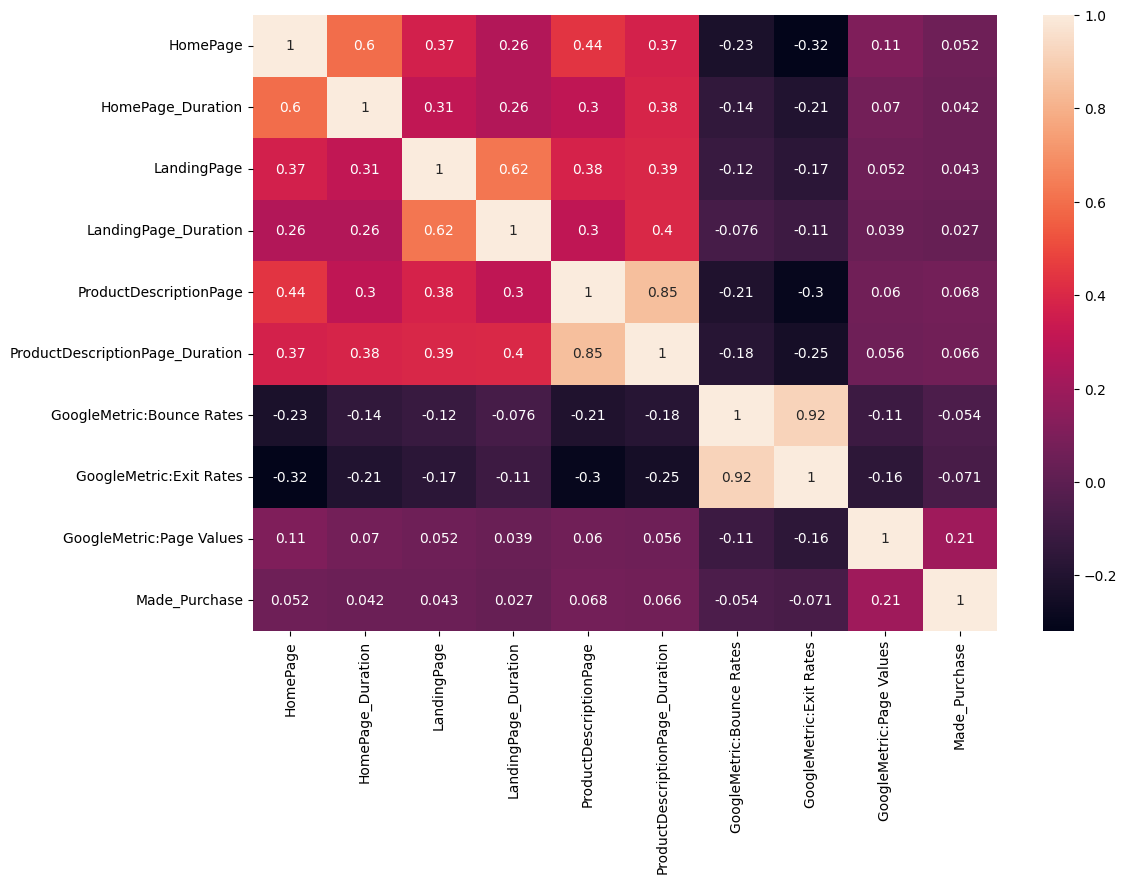

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

**Observations**
<li>There is high correlation between first 6 columns which should be handled before training model sensitive to presence of correlated features.

##  Null Value Analysis
<a id="nva"></a>


In [ ]:
data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

**Observations**
<li>A lot of null values are present which must be fixed as most of the classification models cannot process null values.

## Target Analysis
<a id="target"></a>

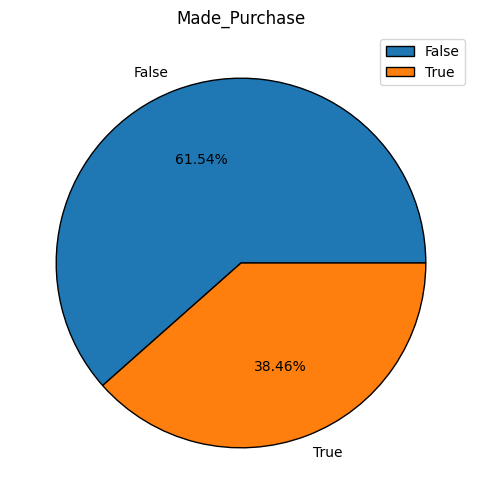

In [ ]:
plt.figure(figsize=(15,6))
plt.pie(data.Made_Purchase.value_counts(),
        labels=["False", "True"],
        autopct='%.2f%%',
        wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.title("Made_Purchase")
plt.legend()
plt.show()

**Inferences**

<ul>
    <li>61.54% of the users who visited the website did not make any purchase.</li>
    <li>38.46% of the users who visited the website made purchases.</li>
    <li>Dataset is imbalanced in the ratio 1.6:1 favoring <i>False</i> values</li>
    <li><b>Conclusion:</b> We may need to use techniques to handle imbalanced datasets.
</ul>
This data indicates that the customers visiting the website do not always make a purchase. Let us examine the various other data pointers in the dataset to try and infer what makes the customer to make a purchase or not.

## Univariate Analysis
<a id="uva"></a>


### Numerical Features
<a id="unf"></a>

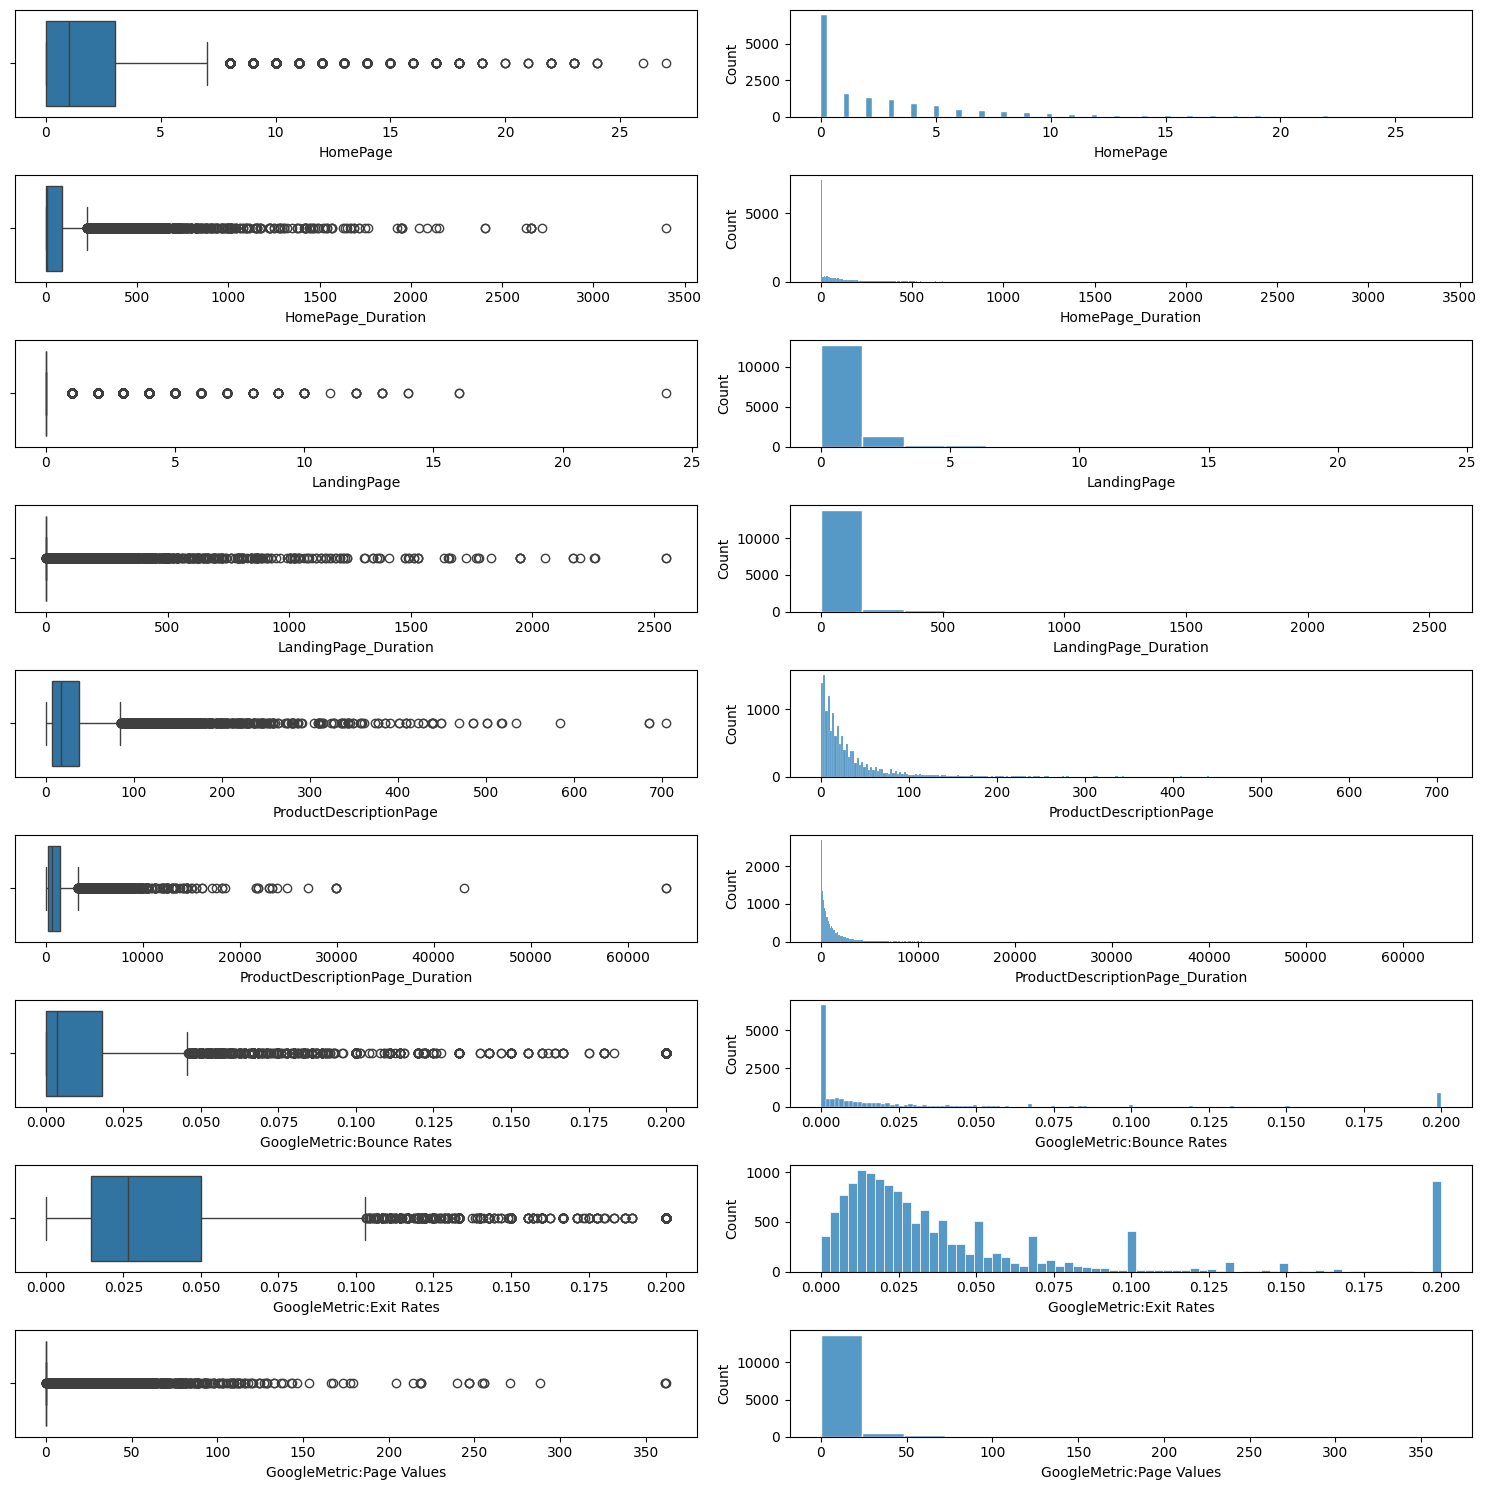

In [ ]:
cols = data.select_dtypes(include=np.number).columns.values
fig, ax = plt.subplots(len(cols), 2, figsize = (15, 15))
for i in range(len(cols)):
    sns.set_style("darkgrid")
    sns.boxplot(x= data[cols[i]], ax = ax[i,0])
    sns.histplot(data[cols[i]], ax = ax[i,1])
plt.tight_layout()

**Inferences**

<li>Data has very high skew which must be fixed using appropriate transformation technique.
<li>Most of the data is either Exponentially distributed or Normally Distributed.
<li> A lot of outliers are present in the data, but a lot of the information is in the outliers.
    

###  Categorical Features
<a id="ucf"></a>

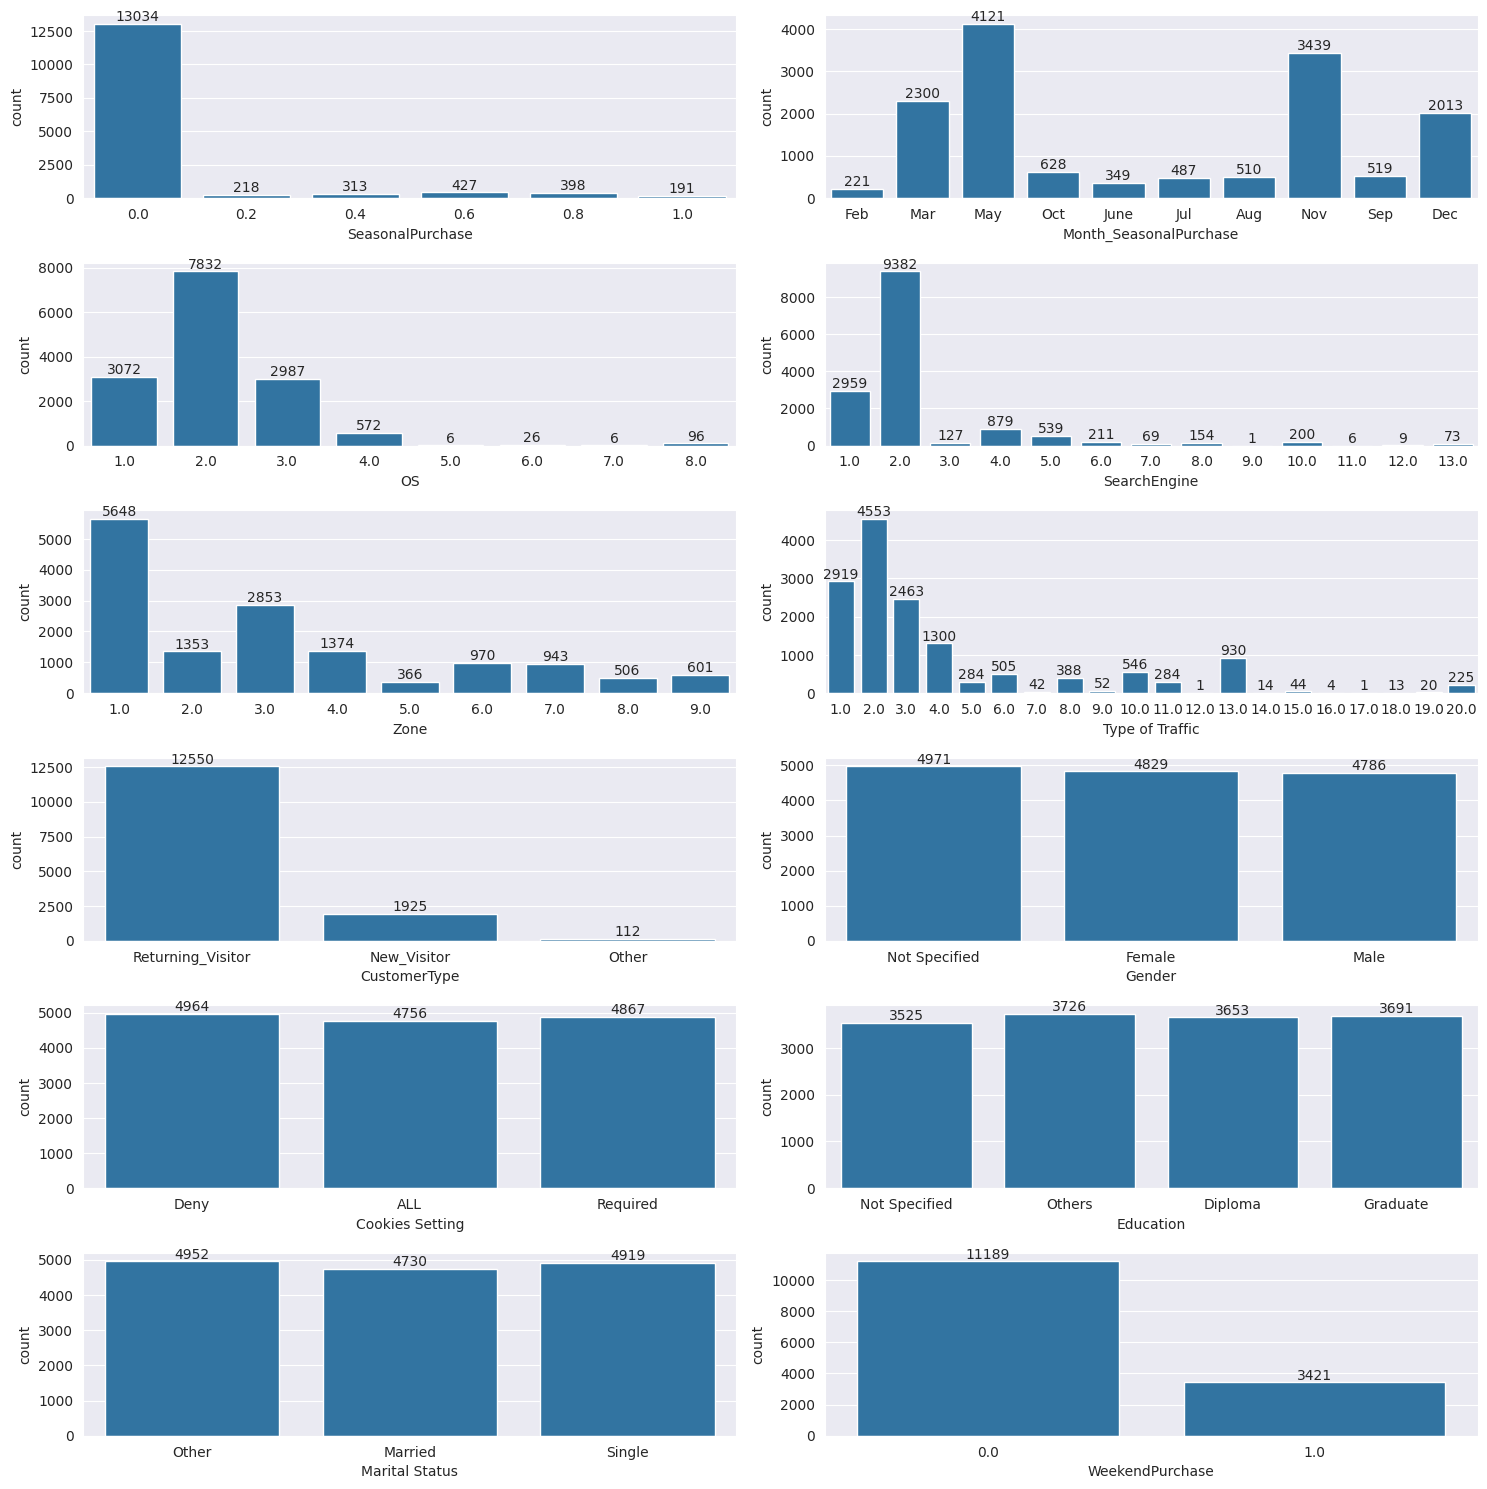

In [ ]:
cols = data.select_dtypes(include="object").columns.values
fig, ax = plt.subplots(int(np.ceil(len(cols)/2)), 2, figsize = (15, 15))

j = 0
for i in range(len(cols)):
    sns.set_style("dark")
    pl = sns.countplot(x= data[cols[i]], ax = ax[i//2,j])
    pl.bar_label(pl.containers[0])
    j = (j+1)%2
plt.tight_layout()
plt.show()

**Inferences**

<li>A huge portion of the purchases on a special day happened in the month of May, November and March.
<li>Almost all of the traffic is coming from OS type 1-4, so our ML models should give importance to these.
<li>Majority of the traffic is coming from Search Engine 2 followed by Search Engine 1.
<li>A huge portion of the traffic is coming from Zone 1 and 3.
<li><code>Traffic type</code> is right skewed and looks like a Normal Distribution.
<li>86.17% of the visitors as Returning Visitors.
<li>Male, Female and Not Specified gender equally visit our website.
<li>Customers with various types of Cookies Setting visit equally to our website.
<li>People from all educational background equally visit our website.
<li> People of all marital status equally visit our website.
<li>Majority of the Purchases made are not on a weekend.

##  Bivariate Analysis
<a id="bva"></a>



### Numerical vs Made_Purchase
<a id="bvnmp"></a>

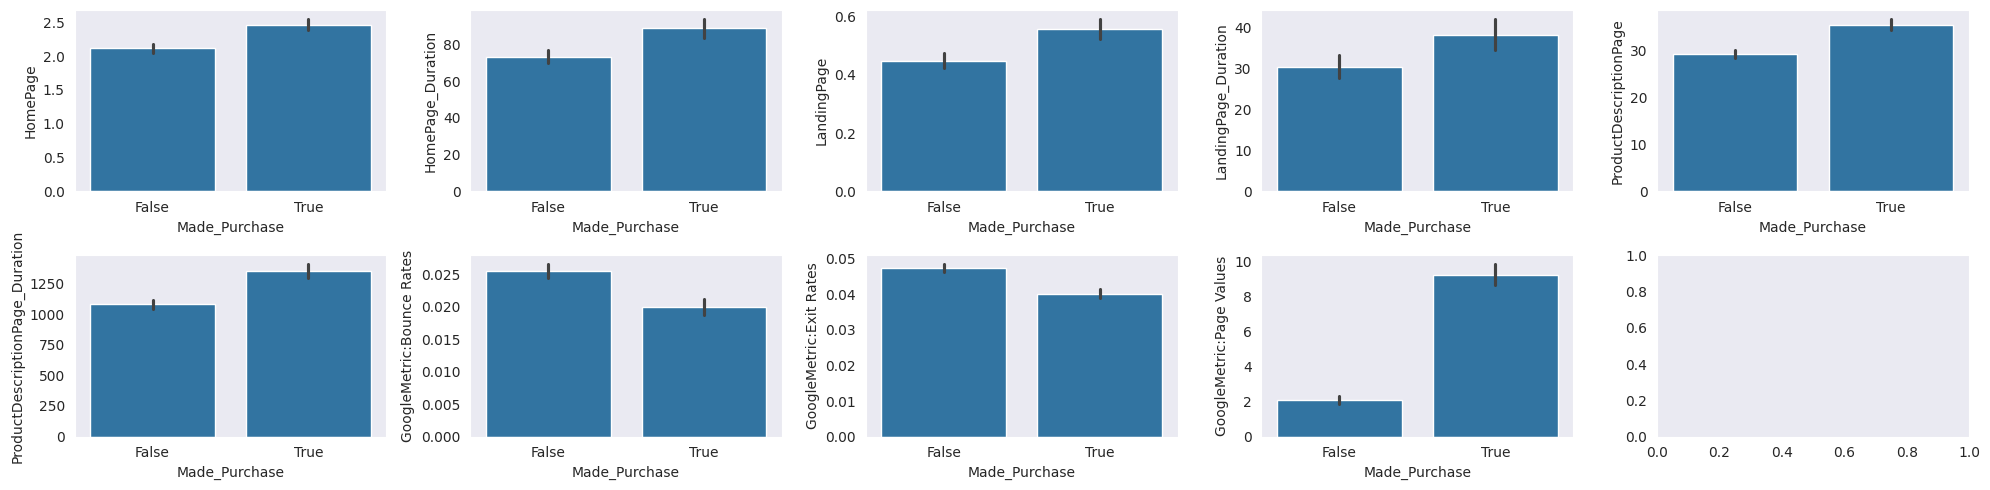

In [ ]:
cols=data.select_dtypes(include=np.number).columns.values
num_chart_cols = 5
fig, ax = plt.subplots(int(np.ceil(len(cols)/num_chart_cols)), num_chart_cols, figsize = (20, 5))

j = 0
for i in range(len(cols)):
    sns.set_style("darkgrid")
    sns.barplot(y=data[cols[i]], x=data['Made_Purchase'], ax = ax[i//num_chart_cols,j])
    j = (j+1)%num_chart_cols
plt.tight_layout()
plt.show()

**Inferences**

<li>The users who visit frequently are more likely to purchase products.
<li>The users who spend more time on pages are more likely to purchase products.
<li>Higher the bounce/exit rate, less the chances of making purchase.
<li>High Page value is an important measure to determine whether product purchased or not.


## Multivariate Analysis
<a id="mva"></a>


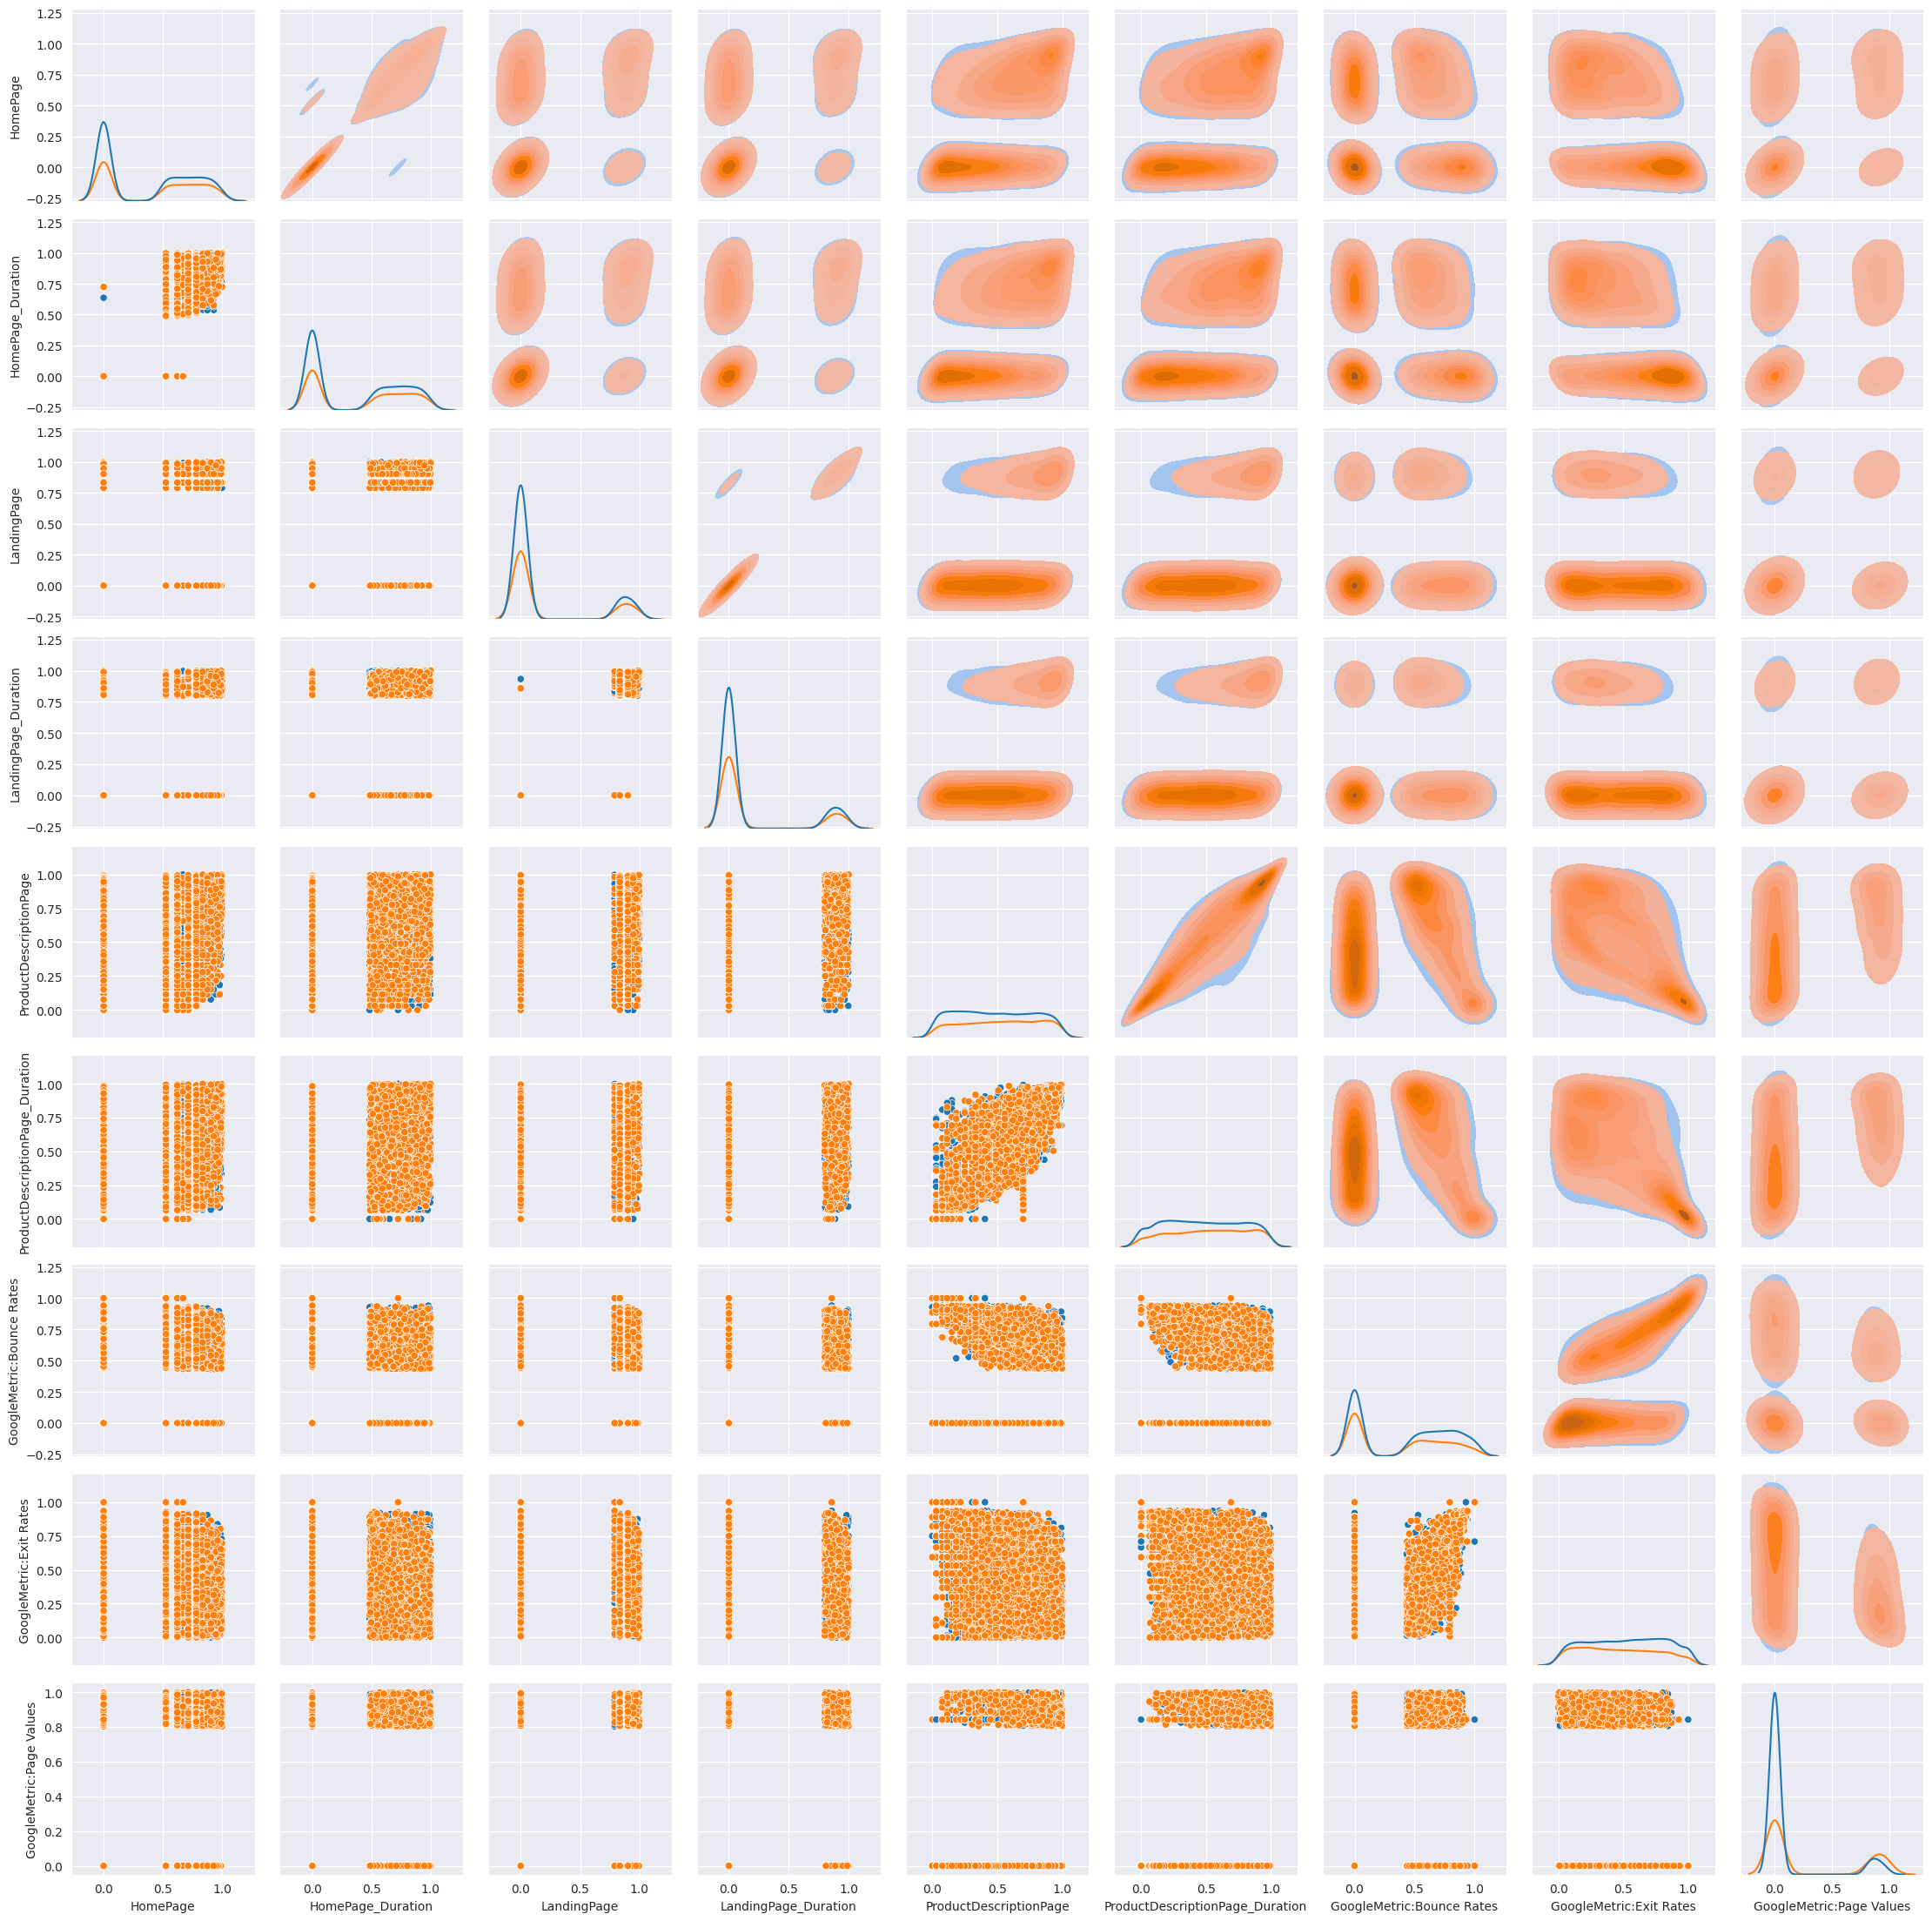

In [ ]:
ppData = data.select_dtypes(include=[np.number, 'bool'])
ppData = SimpleImputer().fit_transform(ppData)
ppData = pd.DataFrame(QuantileTransformer().fit_transform(ppData), columns=data.select_dtypes(include=[np.number, 'bool']).columns.values)

g = sns.PairGrid(ppData, hue="Made_Purchase")
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, fill=True)
g.map_diag(sns.kdeplot)

**Observations**
<li>Most of the data in the True and False classes overlap. This may lead to high error rate in non-ensembling classifiers.
<li>Ensembline/Stacking Classifiers will be required for better predictions of the dataset.

# Data Preprocessing and Model Training
<a id="dpmt"></a>


##  Custom Preprocessing Methods
<a id="dpmtcpm"></a>
Aggregating the lower-frequent categories of <i>Zone, OS, SearchEngine, TypeOfTraffic,CustomerType</i>

In [ ]:
NUM_FEATURES = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric:Bounce Rates", "GoogleMetric:Exit Rates", "GoogleMetric:Page Values", "SeasonalPurchase"]
CAT_FEATURES = ["Month_SeasonalPurchase", "OS", "SearchEngine", "Zone", "Type of Traffic", "CustomerType", "Gender", "Cookies Setting", "Education", "Marital Status"]
BOOL_FEATURES = ["WeekendPurchase", "Made_Purchase"]

class CategoricalDataManipulator(BaseEstimator, TransformerMixin) :
     def __init__(self, columns) :
          self.columns = columns
          return None

     def fit(self, data, y=None) :
          return self

     def transform(self, data, y=None) :
          data = pd.DataFrame(data, columns=self.columns)
          data.loc[data["OS"] >= 4.0, ["OS"]] = 4
          data.loc[data["SearchEngine"] >= 3, ["SearchEngine"]] = 3
          data.loc[data["Zone"] == 2, ["Zone"]] = 2
          data.loc[data["Zone"] >= 4, ["Zone"]] = 4
          data.loc[data["Type of Traffic"] >= 4, ["Type of Traffic"]] = 4
          data.loc[data["CustomerType"] == "Other", ["CustomerType"]] = "New_Visitor"
          data.replace({0:0.0001}, inplace=True)
          return data




<li><b>KNN Imputer</b> has been used to impute missing values in numerical columns.
<li><b>Simple Imputer with Mode Strategy</b> has been used to impute missing values in categorical columns.
<li><b>Quantile Transformer</b> has been used to scale the dataset and reduce outliers.
<li><b>PCA</b> has been used to reduce correlation in the dataset.
<li><b>OneHotEncoder</b> has been used to convert categorical data to numerical form.

In [ ]:
num_pipeline = Pipeline([
    ("nimpute", KNNImputer(n_neighbors=50)),
    ("nqt", QuantileTransformer()),
    ("pca", PCA()),
])

cat_pipeline = Pipeline([
    ("cimpute", SimpleImputer(strategy="most_frequent")),
    ("cdm", CategoricalDataManipulator(columns=CAT_FEATURES)),
    ("ohe", OneHotEncoder(handle_unknown='ignore')),
])

preprocessing = ColumnTransformer([
    ('NumericalPipe', num_pipeline, NUM_FEATURES),
    ('CategoricalPipe', cat_pipeline, CAT_FEATURES)
])

clf = lambda model: ipipe([
    ("Preprocessing", preprocessing),
    ("Model", model)
])

clf(DummyClassifier())

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('NumericalPipe',
                                                  Pipeline(steps=[('nimpute',
                                                                   KNNImputer(n_neighbors=50)),
                                                                  ('nqt',
                                                                   QuantileTransformer()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  ['HomePage',
                                                   'HomePage_Duration',
                                                   'LandingPage',
                                                   'LandingPage_Duration',
                                                   'ProductDescriptionPage',
                                                   'ProductDescriptionPage_Duration',
                                                   'GoogleMetric:Bounce Rates',
                                                   'GoogleMetri...
                                                                   CategoricalDataManipulator(columns=['Month_SeasonalPurchase',
                                                                                                       'OS',
                                                                                                       'SearchEngine',
                                                                                                       'Zone',
                                                                                                       'Type '
                                                                                                       'of '
                                                                                                       'Traffic',
                                                                                                       'CustomerType',
                                                                                                       'Gender',
                                                                                                       'Cookies '
                                                                                                       'Setting',
                                                                                                       'Education',
                                                                                                       'Marital '
                                                                                                       'Status'])),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month_SeasonalPurchase',
                                                   'OS', 'SearchEngine', 'Zone',
                                                   'Type of Traffic',
                                                   'CustomerType', 'Gender',
                                                   'Cookies Setting',
                                                   'Education',
                                                   'Marital Status'])])),
                ('Model', DummyClassifier())])

## Preprocessing Pipeline
<a id="ppp"></a>

## Splitting Training and Test datasets
<a id="sttd"></a>
Splitting the dataset into Training and Test sets in the 70:30 ratio.

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.3, random_state=9093)

y = data_train["Made_Purchase"]
X = data_train.drop('Made_Purchase', axis=1)
y_test = data_test["Made_Purchase"]
X_test = data_test.drop('Made_Purchase', axis=1)

print("Shape of Training set: {}".format(X.shape))
print("Shape of Test set: {}".format(X_test.shape))

Shape of Training set: (10311, 21)
Shape of Test set: (4420, 21)


## Model Selection
<a id="mods"></a>


### Baseline Model
<a id="modsbm"></a>



Creating a baseline model using LogisticRegression to evaluate the performance of other models

              precision    recall  f1-score   support

       False       0.69      0.88      0.77      2786
        True       0.61      0.33      0.43      1634

    accuracy                           0.67      4420
   macro avg       0.65      0.60      0.60      4420
weighted avg       0.66      0.67      0.64      4420



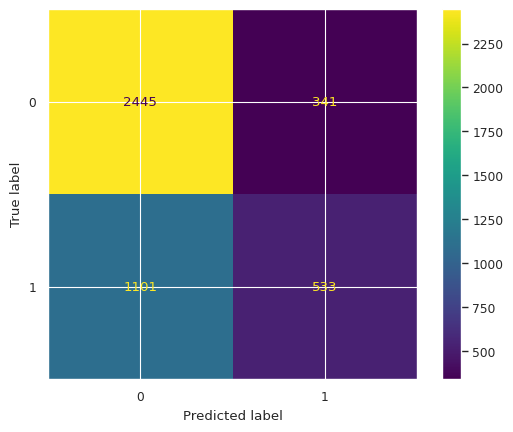

In [ ]:
model = clf(LogisticRegression())
model.fit(X,y)
confusion_model(model, X_test, y_test)

**Inferences**
<li>Any model we train/tune must have scores better than the ones predicted above.

### Binary Classifiers
<a id="modsbc"></a>


We will train various classifiers available in sklearn library on our training data and evaluate the performance using F1 Scores. None of the classifiers here is an ensembling classifier.

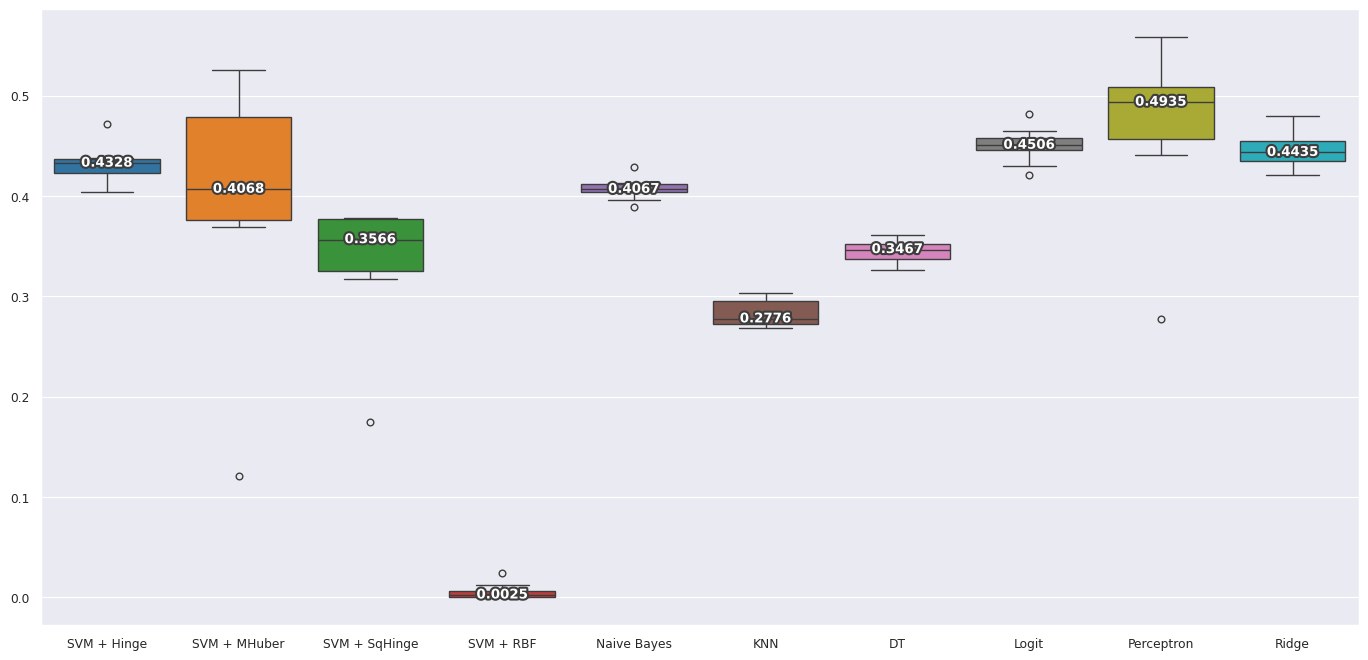

In [ ]:
model_list = [
    ('SVM + Hinge', SGDClassifier(loss='hinge')), # simple SVM
    ('SVM + MHuber', SGDClassifier(loss='modified_huber')), # RobustClassifier; less sensitive to outliers
    ('SVM + SqHinge', SGDClassifier(loss='squared_hinge')), # SVM with better errors
    ('SVM + RBF', SVC(kernel="rbf",C=0.06060606060606061, gamma=0.030612244897959183)),
    ('Naive Bayes', BernoulliNB()),
    ('KNN', KNeighborsClassifier(weights="distance")),
    ('DT', DecisionTreeClassifier(criterion="entropy", class_weight="balanced")),
    ('Logit', LogisticRegression(solver='saga', class_weight="balanced")),
    ('Perceptron', Perceptron()),
    ('Ridge', RidgeClassifier(solver='auto', class_weight="balanced")),
]

names, results = [], []

for i in range(len(model_list)):
    cvs = cross_val_score(clf(model_list[i][1]), X, y, n_jobs=-1, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2), scoring='f1', error_score=0)
    names.append(model_list[i][0])
    results.append(cvs)

plot_models_score(results=results, names=names)

:

1. **SVM + Hinge (`SGDClassifier(loss='hinge')`)**: This is a linear Support Vector Machine (SVM) implemented through stochastic gradient descent (SGD). The hinge loss is used for maximizing the margin between data points of different classes, making it effective for binary classification tasks.

2. **SVM + MHuber (`SGDClassifier(loss='modified_huber')`)**: This classifier uses the modified Huber loss, which is less sensitive to outliers than the hinge loss. It combines the robustness of hinge loss with smooth loss functions, offering a compromise between robustness and sensitivity to outliers.

3. **SVM + SqHinge (`SGDClassifier(loss='squared_hinge')`)**: This is another variation of SVM that uses the squared hinge loss. The squaring makes the loss more strict with points that are classified correctly but are close to the decision boundary, potentially leading to better margin optimization.

4. **SVM + RBF (`SVC(kernel="rbf",C=0.06060606060606061, gamma=0.030612244897959183)`)**: This SVM uses the Radial Basis Function (RBF) kernel to transform the input space into a higher-dimensional space, making it easier to find a linear separation. The `C` parameter controls the trade-off between smooth decision boundary and classifying training points correctly. `Gamma` defines how far the influence of a single training example reaches.

5. **Naive Bayes (`BernoulliNB()`)**: This is a simple probabilistic classifier based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. The Bernoulli variant is designed for binary/boolean features.

6. **KNN (`KNeighborsClassifier(weights="distance")`)**: The K-Nearest Neighbors classifier predicts the class of a data point based on the majority vote of its `k` nearest neighbors. Using `weights="distance"`, closer neighbors have a greater influence on the vote than further ones.

7. **Decision Tree (`DecisionTreeClassifier(criterion="entropy", class_weight="balanced")`)**: This model creates a decision tree that aims to reduce entropy (uncertainty) with each split. It's a non-linear model capable of capturing complex patterns. Using `class_weight="balanced"` helps to adjust weights inversely proportional to class frequencies, useful for imbalanced datasets.

8. **Logistic Regression (`LogisticRegression(solver='saga', class_weight="balanced")`)**: Despite its name, logistic regression is a linear model for binary classification that estimates probabilities using a logistic/sigmoid function. It's fast and interpretable. The `class_weight="balanced"` option is used to handle imbalanced data.

9. **Perceptron**: A type of linear classifier that updates its weights through a simple rule based on the errors made on training examples. It's one of the simplest types of artificial neural networks.

10. **Ridge Classifier (`RidgeClassifier(solver='auto', class_weight="balanced")`)**: This is essentially applying Ridge regression (L2 regularization) to classification problems. It minimizes a penalized version of the least squares loss function, and the `class_weight="balanced"` parameter helps address class imbalance.




**Observations**

1. **SVM + Hinge**: Shows moderate performance with a median F1 score around 0.4233. The box plot indicates low variance in the scores.
2. **SVM + MHuber**: Has a slightly better performance with a median F1 score near 0.4461. This model also shows low variance, indicating stable performance across different folds.
3. **SVM + SqHinge**: Comparable performance to SVM + MHuber with a median F1 score around 0.4061. The variance is similarly low.
4. **SVM + RBF**: Performs poorly in this context with a significantly lower median F1 score (0.0062), suggesting that the RBF kernel might not be suitable for this particular dataset or requires parameter tuning.
5. **Naive Bayes**: Also shows a relatively low performance with a median F1 score of 0.2817, which might be due to the assumption of feature independence or the binary feature representation's influence.
6. **KNN**: Exhibits a median F1 score of 0.3445 but with an outlier, suggesting variability in its performance across folds.
7. **Decision Tree (DT)**: Performs moderately with a median F1 score around 0.4047. Decision trees can capture complex patterns but might be prone to overfitting.
8. **Logit (Logistic Regression)**: Shows one of the highest performances with a median F1 score of 0.4484, highlighting its effectiveness as a robust linear model for binary classification.
9. **Perceptron**: This model has a median F1 score of 0.4577, showing surprisingly high performance. This might indicate a dataset where a linear decision boundary is effective.
10. **Ridge**: Similar to the Perceptron and Logit models, it shows high performance with a median F1 score of 0.4483, further indicating that linear models are performing well on this dataset.



### Ensembling Classifiers
<a id="modsec"></a>


As seen in the previous training run, the f1 scores of our models is less than 0.6 which is very less score. To improve the score, bias-reducing ensembling methods are applied in this section

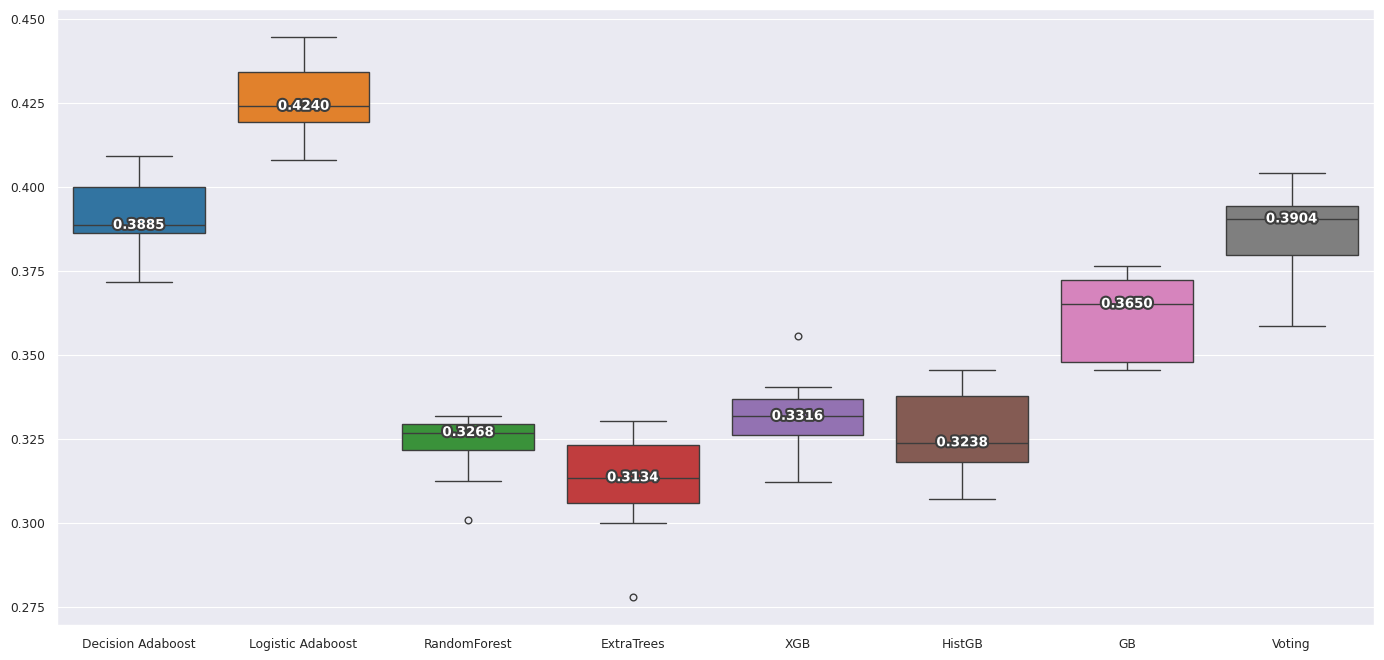

In [ ]:
|model_list = [
    ('Decision Adaboost', AdaBoostClassifier()),
    ('Logistic Adaboost', AdaBoostClassifier(LogisticRegression())),
    ('RandomForest', RandomForestClassifier(criterion="entropy", n_estimators=300)),
    ('ExtraTrees', ExtraTreesClassifier(n_estimators=300, criterion='gini')),
    ('XGB', XGBClassifier(objective="binary:logistic")),
    ('HistGB', HistGradientBoostingClassifier(max_iter=1000)),
    ('GB', GradientBoostingClassifier(n_estimators=300)),
    ('Voting', VotingClassifier(
        estimators=[
             ('lr', LogisticRegression(solver='liblinear',penalty='l2', random_state=0) ),
             ('kn', KNeighborsClassifier(n_neighbors=50)),
             ],
             voting='soft')
    )
]

names, results = [], []

for i in range(len(model_list)):
    cvs = cross_val_score(clf(model_list[i][1]), X, y, n_jobs=-1, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2), scoring='f1', error_score=0)
    names.append(model_list[i][0])
    results.append(cvs)

plot_models_score(results=results, names=names)



1. **Decision Adaboost (`AdaBoostClassifier()`)**: AdaBoost, short for Adaptive Boosting, is an ensemble method that combines multiple weak classifiers to create a strong classifier. It adjusts the weights of incorrectly classified instances so that subsequent classifiers focus more on difficult cases. This version uses decision trees as the base estimator by default.

2. **Logistic Adaboost (`AdaBoostClassifier(LogisticRegression())`)**: This is AdaBoost with logistic regression as the base classifier. It’s somewhat unusual to boost logistic regression, but it can increase the model's complexity by focusing on harder-to-classify instances.

3. **RandomForest (`RandomForestClassifier(criterion="entropy", n_estimators=300)`)**: A RandomForest is an ensemble of decision trees, typically trained via the bagging method. Using multiple trees reduces the risk of overfitting. Trees are made diverse by randomly selecting subsets of features and instances. The `entropy` criterion is used for information gain.

4. **ExtraTrees (`ExtraTreesClassifier(n_estimators=300, criterion='gini')`)**: Similar to RandomForest, the Extremely Randomized Trees classifier introduces extra randomness by choosing thresholds for splitting randomly, not just the best threshold as RandomForest does. It uses the `gini` criterion for measuring the quality of a split.

5. **XGB (`XGBClassifier(objective="binary:logistic")`)**: XGBoost stands for Extreme Gradient Boosting. It’s a more efficient implementation of gradient boosting, designed for speed and performance. The `binary:logistic` objective is used for binary classification tasks.

6. **HistGB (`HistGradientBoostingClassifier(max_iter=1000)`)**: This classifier is a fast, histogram-based gradient boosting machine. It builds trees in a greedy fashion, optimizing a loss function. It's efficient with large datasets and supports categorical features natively.

7. **GB (`GradientBoostingClassifier(n_estimators=300)`)**: Gradient Boosting constructs additive models in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. Each new tree corrects errors made by previously trained trees.

8. **Voting (`VotingClassifier(estimators=[...], voting='soft')`)**: A Voting Classifier is an ensemble meta-model that combines conceptually different machine learning classifiers and uses a majority vote (hard voting) or the average predicted probabilities (soft voting) to predict the class labels. Soft voting, which you’re using, gives more weight to highly confident votes.



**Observations**


1. **Decision Adaboost**: This boosting model has a median F1 score of 0.3847, showing that boosting decision trees provides a decent improvement.
2. **Logistic Adaboost**: Similar to Decision Adaboost but slightly better with a median F1 score of 0.4187.
3. **RandomForest**: Has a median F1 score of 0.3235, which is surprisingly lower than some of the simpler models, possibly due to overfitting or the need for hyperparameter tuning.
4. **ExtraTrees**: Similar to RandomForest, with a median F1 score of 0.3193, indicating that the extra randomness did not significantly improve performance.
5. **XGB**: Performs moderately with a median F1 score of 0.3605. XGBoost is known for its efficiency and effectiveness but may require careful tuning.
6. **HistGB**: Shows a median F1 score of 0.3297, which is lower than expected for gradient boosting models, suggesting the need for parameter adjustments.
7. **GB (GradientBoosting)**: Has a median F1 score of 0.3810, indicating decent performance.
8. **Voting**: The soft voting classifier combines Logistic Regression and KNN, yielding a median F1 score of 0.3454. The performance is moderate, suggesting that the combination did not synergize as well as hoped.



**Inferences**

- Linear models (Logit, Perceptron, Ridge) and SVMs with modified Huber loss performed particularly well, indicating that the dataset might be linearly separable or close to it.
- Ensemble models, especially boosting with AdaBoost, showed improvements but did not outperform the best linear models. This might indicate the dataset's characteristics or the need for further model tuning.
- The poor performance of some models (e.g., SVM + RBF, Naive Bayes) suggests that not all algorithms are well-suited to the dataset without significant parameter tuning or data preprocessing.
- Considering the variance and outliers in the box plots can provide insights into model stability across cross-validation folds.


Ensembling methods have not reduced error in predictions. We have to try various Heterogenous Model Combinations and see if the score improves.

After testing a lot of combinations, the combination of models in the next section proved to be the best one based on the scores.

## Final Model Training and Tuning
<a id="mtt"></a>


Stacking and Voting Generally helps to increase the performance of the classification models. The stack chosen here is after careful tuning and choosing from the list of models above to achieve the best possible F1 score.
<b>GridSearchCV</b> was used to Tune each model individually before adding to the Stack.

In [ ]:
estimators = [
    ('SVM', SVC(kernel="rbf",C=0.06060606060606061)),
    ('RandomForest1', RandomForestClassifier(criterion="entropy", n_estimators=600)),
    ('ExtraTrees2', ExtraTreesClassifier(n_estimators=600, criterion='entropy')),
    ('XGB', XGBClassifier(objective="binary:logistic")),
    ('HistGB', HistGradientBoostingClassifier(max_iter=1300)),
    ('GB', GradientBoostingClassifier(n_estimators=300)),
]

classifier = clf(StackingClassifier(estimators=estimators))
classifier.fit(X, y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('NumericalPipe',
                                                  Pipeline(steps=[('nimpute',
                                                                   KNNImputer(n_neighbors=50)),
                                                                  ('nqt',
                                                                   QuantileTransformer()),
                                                                  ('pca',
                                                                   PCA())]),
                                                  ['HomePage',
                                                   'HomePage_Duration',
                                                   'LandingPage',
                                                   'LandingPage_Duration',
                                                   'ProductDescriptionPage',
                                                   'ProductDescriptionPage_Duration',
                                                   'GoogleMetric:Bounce Rates',
                                                   'GoogleMetri...
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...)),
                                                ('HistGB',
                                                 HistGradientBoostingClassifier(max_iter=1300)),
                                                ('GB',
                                                 GradientBoostingClassifier(n_estimators=300))]))])

<a id="etm"></a>

##  Evaluating the model
Evaluating the model against test dataset using F1 Score as primary scoring parameter.

              precision    recall  f1-score   support

       False       0.78      0.84      0.81      2786
        True       0.68      0.60      0.64      1634

    accuracy                           0.75      4420
   macro avg       0.73      0.72      0.72      4420
weighted avg       0.75      0.75      0.75      4420



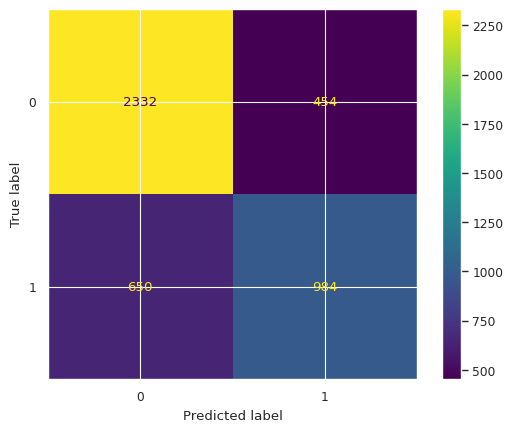

In [ ]:
confusion_model(classifier, X_test, y_test)

F1 Score of 0.81 for False and 0.64 for True is a considerable improvement over non-ensembling and non-stacked classifiers. Let us use this model for final predictions.

## Submitting the Results
Submitting the final predictions for evaluation against private test cases.

In [ ]:
sub = pd.DataFrame(classifier.predict(sub_data), columns=["Made_Purchase"])
sub["Made_Purchase"].replace({-1:False, 1:True}, inplace=True)
counts = sub.value_counts()
print(counts)
print(counts[0]/counts[1])
sub.index.name = 'id'
sub.to_csv("submission.csv", encoding='utf-8')

output = pd.read_csv("submission.csv")
display(output.head())
display(output.shape)

Made_Purchase
False            4347
True             2252
dtype: int64
1.9302841918294849


,id,Made_Purchase
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


(6599, 2)

# Conclusion

In our endeavor to explore predictive modeling for this dataset, we embarked on a comprehensive journey through a wide array of machine learning techniques, ranging from simple linear models to more complex ensemble methods. Our findings have underscored several key insights that have significantly shaped our understanding and approach to this data.

Firstly, the strong performance of linear models, such as Logistic Regression, Perceptron, and Ridge Classification alongside SVMs with modified Huber loss, signals a potentially linear separability of the dataset. This discovery suggests that for the specific dynamics and characteristics inherent in our data, simplicity might not just be a virtue but a potent strategy. It highlights the often-overlooked power of linear models in dealing with datasets that, despite their complexity, adhere to linear patterns.

However, our exploration of ensemble methods, particularly boosting techniques like AdaBoost, while resulting in improvements, did not surpass the benchmark set by the best-performing linear models. This outcome invites a deeper reflection on the dataset's unique properties and further underscores the necessity for meticulous model tuning. Ensemble methods, celebrated for their error-reducing prowess, revealed that there is no one-size-fits-all solution in machine learning. Each dataset demands a tailored approach, underscoring the importance of understanding the data and the underlying assumptions of each model.

The underwhelming performance of certain models, such as SVM with RBF kernel and Naive Bayes, further emphasizes the critical role of model selection, parameter tuning, and data preprocessing. It's a stark reminder that algorithm suitability is highly dependent on the dataset at hand, and that meticulous preprocessing and tuning are indispensable steps in the modeling process.

The examination of model stability through the lens of variance and outliers in box plots provided invaluable insights into each model's reliability across different folds. This analysis not only shed light on the robustness of our models but also guided our iterative refinement process.

After extensive testing and evaluation of numerous model combinations, we identified a set of models that, when combined, yielded the most promising results based on our scoring criteria. This optimal combination represents a harmonious blend of different algorithmic strengths, tailored to the nuances of our dataset.

In conclusion, our journey through the landscape of machine learning models for this dataset has been illuminating. It has reaffirmed the importance of a principled approach to model selection, the need for thorough tuning, and the value of understanding the dataset's characteristics. As we move forward, the insights gained from this exploration will undoubtedly inform our future endeavors in predictive modeling, paving the way for more informed, nuanced, and effective solutions.